In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("/Users/dishabhatnagar/Desktop/Titanic/train.csv")

In [3]:
test = pd.read_csv("/Users/dishabhatnagar/Desktop/Titanic/test.csv")

In [4]:
print(train.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(test.head())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [6]:
print(train.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
# Handle missing values 

train.isna().head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
print(train.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print(test.isna().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
## Imputing missing values with mean 

train.fillna(train.mean(), inplace=True)


In [11]:
# Fill missing values with mean column values in the test set

test.fillna(test.mean(), inplace=True)


In [12]:
print(train.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
## Yes, you can see there are still some missing values in the Cabin and 
## Embarked columns. This is because these values are non-numeric.
## In order to perform the imputation the values need to be in numeric form. 
## There are ways to convert a non-numeric value to a numeric one.

In [ ]:
## Let's start with finding out which features are categorical and which are numerical.

In [ ]:
##Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
## Continuous: Age, Fare. Discrete: SibSp, Parch.
## Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric. Let see some sample values.

In [13]:
train['Cabin'].head()


0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [14]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [15]:
## features like Name, Ticket, Cabin and Embarked do not have any impact on the survival status of the passengers. 
print(train.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0            1         0       3    male  22.0      1      0   7.2500
1            2         1       1  female  38.0      1      0  71.2833
2            3         1       3  female  26.0      0      0   7.9250
3            4         1       1  female  35.0      1      0  53.1000
4            5         0       3    male  35.0      0      0   8.0500


In [16]:
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)


In [17]:
labelEncoder = LabelEncoder()

In [18]:
labelEncoder.fit(train['Sex'])


LabelEncoder()

In [19]:
labelEncoder.fit(test['Sex'])


LabelEncoder()

In [20]:
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [21]:
print(train.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0            1         0       3    1  22.0      1      0   7.2500
1            2         1       1    0  38.0      1      0  71.2833
2            3         1       3    0  26.0      0      0   7.9250
3            4         1       1    0  35.0      1      0  53.1000
4            5         0       3    1  35.0      0      0   8.0500


In [22]:
## We will train our k means model now 
## I will first drop the Survival column from the data to make it a unlabelled data

X = np.array(train.drop(['Survived'], 1).astype(float))


In [23]:
y = np.array(train['Survived'])


In [ ]:
## i will be using K-means clustering for partitioning.
## as we already know the number of clusters or cluster centres i.e 2 in this case.
## Also K-means is faster than other clustering methods.

In [24]:
kmeans = KMeans(n_clusters=2) # We want cluster the passenger records into 2: Survived or Not survived

In [25]:
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
## Checking how many predictions are made


In [26]:
## scaling the values 
scaler = MinMaxScaler()


In [27]:
X_scaled = scaler.fit_transform(X)


In [28]:
kmeans.fit(X_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6262626262626263


In [32]:
y_kmeans = kmeans.predict(X)


In [34]:
y_kmeans

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

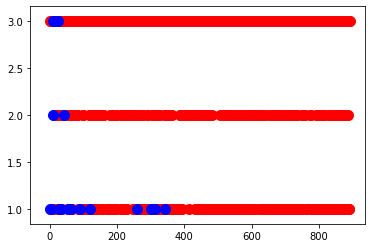

In [36]:
## After scaling the values , the accuracy has increased
plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans ==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans ==1, 1], s=100, c='blue', label ='Cluster 2')
plt.show()


In [37]:
## calculate silhoutte score
from sklearn.cluster import KMeans


In [38]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)


In [39]:
print(kmeans.cluster_centers_)


[[6.69000000e+02 2.27640449e+00 6.78651685e-01 3.05902056e+01
  4.58426966e-01 3.68539326e-01 3.19209546e+01]
 [2.23500000e+02 2.34080717e+00 6.16591928e-01 2.88100277e+01
  5.87443946e-01 3.94618834e-01 3.24868262e+01]]


In [40]:
# Get the cluster labels
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

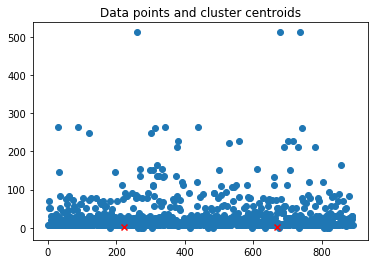

In [43]:
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [44]:
from sklearn.metrics import silhouette_score


In [45]:
print(silhouette_score(X, kmeans.labels_))


0.5951870787803007
